# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    data = pd.read_csv('real_estate_data.csv', sep = '\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#посмотрим типы данных и кол-во ненулевых значений
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Вывод:**

Заметили следующее:
1. first_day_exposition - object - должен быть тип datetime
2. ceiling_height - нулевые значения
3. floors_total - должен быть тип int, т.к. количество этажей - целое значение + нулевые значения
4. is_apartment - должен быть тип bool + нулевые значения
5. living_area - нулевые значения
6. kitchen_area - нулевые значения
7. balcony - нулевые значения
8. locality_name  - нулевые значения
9. airports_nearest - нулевые значения
10. cityCenters_nearest - нулевые значения
11. parks_around3000 - тип должен быть int + нулевые значения
12. parks_nearest  - нулевые значения
13. ponds_around3000 - тип должен быть int + нулевые значения
14. ponds_nearest - нулевые значения
15. days_exposition - тип должен быть int + нулевые значения 


# Шаг 2. Предобработка данных

Для начала получим более конкретрые данные о столбцах, чтобы заметить какие-либо выбивающиеся значения: опечатки, слишком низкие\высокие значения и т.д. 

In [2]:
for column in data:
    print(column)
    print()
    print(data[column].sort_values().unique())
    print('―――――――――――――――――――――――――――――――――――――――――――――――')

total_images

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 35 37 39 42 50]
―――――――――――――――――――――――――――――――――――――――――――――――
last_price

[1.219e+04 4.300e+05 4.400e+05 ... 4.013e+08 4.200e+08 7.630e+08]
―――――――――――――――――――――――――――――――――――――――――――――――
total_area

[ 12.   13.   13.2 ... 631.  631.2 900. ]
―――――――――――――――――――――――――――――――――――――――――――――――
first_day_exposition

['2014-11-27T00:00:00' '2014-11-29T00:00:00' '2014-12-04T00:00:00' ...
 '2019-05-01T00:00:00' '2019-05-02T00:00:00' '2019-05-03T00:00:00']
―――――――――――――――――――――――――――――――――――――――――――――――
rooms

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 19]
―――――――――――――――――――――――――――――――――――――――――――――――
ceiling_height

[  1.     1.2    1.75   2.     2.2    2.25   2.3    2.34   2.4    2.45
   2.46   2.47   2.48   2.49   2.5    2.51   2.52   2.53   2.54   2.55
   2.56   2.57   2.58   2.59   2.6    2.61   2.62   2.63   2.64   2.65
   2.66   2.67   2.68   2.69   2.7    2.71   2.

In [3]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


На данном этапе можем добавить в область наших интересов квартиры с количеством комнат равных 0,
большой разброс высоты потолков, 
в "locacity_name" есть неявные дубликаты,
"cityCenters" режет глаз.

In [4]:
#переведем столбец с датой в формат даты без времени, т.к. время не указано
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

In [5]:
#Произведём подсчёт квартир с нулевым обозначением количества комнат в столбце "rooms"
print(data.query('rooms == 0')['rooms'].count())

#проверим по таблице, к каким данныи относятся 0 комнат
display(data.query('rooms == 0').head(10))

197


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,NaN,24.0,15.50,2,NaN,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27,0,NaN,14.0,17.00,1,NaN,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,NaN,17.0,24.75,4,NaN,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,NaN,26.0,24.30,19,NaN,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10.0,NaN,7,NaN,True,False,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000.0,24.10,2017-12-01,0,2.75,25.0,17.50,21,NaN,True,False,NaN,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000.0,17.00,2017-06-07,0,2.70,9.0,12.00,1,NaN,True,False,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
780,9,2600000.0,26.10,2018-02-20,0,NaN,18.0,NaN,8,NaN,False,True,NaN,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
839,14,1900000.0,35.00,2017-04-14,0,2.70,5.0,15.00,3,False,False,True,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
946,5,2200000.0,23.00,2016-09-27,0,NaN,27.0,18.00,7,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0


Логично предположить, что с такой площадью и отсутствием площади кухни, 0 комнат означает, что это квартиры-студии. В стаком случае отсавим всё как есть, здесь ошибок в указании данных нет.

In [6]:
#посмотрим параметр ceiling_height, видим что есть необоснованно большие и малые значения 
#и в идеале нужно было бы уточнять данные, но пока просто поставим рамки, которые я считаю преемлемыми для минимальной 
#и макимальной высоты потолков
rational_ceiling_height = data.query('ceiling_height > 2 and ceiling_height < 4')['ceiling_height'].mean().round(2)

data.loc[data['ceiling_height'] < 2, 'ceiling_height'] = rational_ceiling_height
data.loc[data['ceiling_height'] > 4, 'ceiling_height'] = rational_ceiling_height

#а так же заполним пропуски медиаными значениями
data['ceiling_height'] = data['ceiling_height'].fillna(rational_ceiling_height)

In [7]:
#посмотрим данные с пропущенными значениями в floors_total
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.20,2018-10-02,2,2.72,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.10,2016-11-23,1,2.72,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.80,2015-08-01,2,2.72,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.60,2017-04-06,3,2.72,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.00,2017-04-22,1,2.72,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
1930,1,9750000.0,66.77,2016-05-13,2,2.72,NaN,NaN,4,NaN,False,False,NaN,0.0,Санкт-Петербург,39886.0,10660.0,1.0,2276.0,3.0,244.0,90.0
2392,7,5395770.0,53.00,2017-06-29,2,2.72,NaN,29.00,22,NaN,False,False,9.00,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
2846,4,2325000.0,27.80,2016-09-21,1,2.72,NaN,19.40,15,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
2952,10,6500000.0,54.30,2019-04-23,1,2.72,NaN,22.20,6,NaN,False,False,12.30,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
3031,9,6400000.0,56.70,2018-03-27,2,2.72,NaN,32.00,12,NaN,False,False,12.00,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0


In [8]:
#ввиду того, что пропущенные значения скорей всего означают,что аппартаменты не входят в предложение по продаже кваритр 
#- выполним замену неизвестных данных на значение False
data['is_apartment'] = data['is_apartment'].fillna(False)

In [9]:
#living_area уменьшим количество знаков после запятой и заменим пропущенные значения медиаными значениями
data['living_area'] = data['living_area'].fillna(data['living_area'].median())
data['living_area'] = data['living_area'].round(0)
#проверим
display(data['living_area'].isna().sum())
display(data['living_area'].value_counts())

0

30.0     3050
18.0     1805
17.0     1251
16.0     1081
28.0      890
20.0      796
19.0      722
31.0      711
32.0      648
15.0      645
27.0      614
29.0      595
42.0      472
43.0      469
40.0      461
33.0      427
34.0      415
44.0      408
38.0      355
36.0      353
35.0      347
39.0      344
14.0      334
37.0      312
48.0      308
46.0      285
45.0      285
47.0      276
41.0      276
26.0      264
50.0      257
21.0      250
49.0      217
22.0      211
52.0      182
25.0      169
54.0      161
53.0      160
56.0      152
24.0      140
51.0      133
55.0      130
60.0      119
23.0      113
58.0       97
57.0       95
64.0       85
13.0       80
63.0       74
12.0       68
68.0       65
62.0       62
70.0       62
59.0       54
66.0       53
65.0       51
11.0       50
61.0       49
67.0       47
10.0       46
80.0       44
72.0       42
75.0       39
73.0       36
69.0       35
76.0       34
78.0       30
95.0       28
74.0       28
71.0       28
79.0       27
82.0  

In [10]:
#kitchen_area уменьшим количество знаков после запятой и заменим пропущенные значения медиаными значениями
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
data['kitchen_area'] = data['kitchen_area'].round(0)
#проверим
display(data['kitchen_area'].isna().sum())
display(data['kitchen_area'].value_counts())

0

9.0      4369
6.0      3136
8.0      2995
10.0     2654
7.0      1947
11.0     1745
12.0     1444
5.0       863
14.0      823
13.0      761
15.0      628
16.0      423
17.0      248
18.0      236
20.0      203
19.0      153
22.0      127
21.0       93
25.0       86
23.0       81
24.0       74
30.0       73
4.0        51
28.0       45
26.0       45
35.0       35
40.0       34
27.0       29
29.0       27
36.0       25
32.0       24
31.0       20
45.0       18
38.0       15
33.0       15
50.0       13
34.0       13
3.0        11
41.0       11
43.0       10
2.0         9
42.0        9
39.0        8
37.0        6
56.0        6
46.0        5
48.0        5
44.0        4
63.0        3
60.0        3
64.0        3
51.0        3
54.0        3
53.0        3
77.0        2
65.0        2
47.0        2
70.0        2
93.0        2
58.0        2
49.0        2
62.0        2
52.0        1
107.0       1
72.0        1
66.0        1
101.0       1
112.0       1
87.0        1
1.0         1
100.0       1
75.0  

In [11]:
#можем предположить, что пропуски в balcony это 0, тогда и заменим их на 0, и изменим тип данных на int
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

In [12]:
#ранее иследовали столбец "locality_name" на предмет уникальных значений. Нужно кое-что попроавить
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')

In [13]:
#приведём наименование столбца "cityCenters_nearest" в однотипный формат
data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}, inplace=True)

In [14]:
# в "parks_around3000" и "ponds_around3000" неизветсные значения скорее всего являются нулевыми
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

Проверим, что все наши старания не прошли даром.

In [15]:
for column in data:
    print(column)
    print()
    print(data[column].sort_values().unique())
    print('―――――――――――――――――――――――――――――――――――――――――――――――')
    
display(data.describe())

display(data.head())

total_images

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 35 37 39 42 50]
―――――――――――――――――――――――――――――――――――――――――――――――
last_price

[1.219e+04 4.300e+05 4.400e+05 ... 4.013e+08 4.200e+08 7.630e+08]
―――――――――――――――――――――――――――――――――――――――――――――――
total_area

[ 12.   13.   13.2 ... 631.  631.2 900. ]
―――――――――――――――――――――――――――――――――――――――――――――――
first_day_exposition

['2014-11-27T00:00:00.000000000' '2014-11-29T00:00:00.000000000'
 '2014-12-04T00:00:00.000000000' ... '2019-05-01T00:00:00.000000000'
 '2019-05-02T00:00:00.000000000' '2019-05-03T00:00:00.000000000']
―――――――――――――――――――――――――――――――――――――――――――――――
rooms

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 19]
―――――――――――――――――――――――――――――――――――――――――――――――
ceiling_height

[2.   2.2  2.25 2.3  2.34 2.4  2.45 2.46 2.47 2.48 2.49 2.5  2.51 2.52
 2.53 2.54 2.55 2.56 2.57 2.58 2.59 2.6  2.61 2.62 2.63 2.64 2.65 2.66
 2.67 2.68 2.69 2.7  2.71 2.72 2.73 2.74 2.75 2.76 2.77 2

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23613.000000,23699.000000,23699.000000,23699.000000,23699.000000,18157.000000,18180.000000,23699.000000,8079.000000,23699.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.720610,10.673824,34.099793,5.892358,10.404658,0.591080,28793.672193,14191.277833,0.469049,490.804555,0.590911,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,0.201392,6.597173,21.164712,4.885249,5.641823,0.959298,12630.880622,8608.386210,0.748534,342.317995,0.883999,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.720000,9.000000,30.000000,4.000000,9.000000,0.000000,26726.000000,13098.500000,0.000000,455.000000,0.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.720000,16.000000,41.000000,8.000000,11.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,4.000000,60.000000,410.000000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.72,11.0,19.0,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.72,5.0,34.0,4,False,False,False,8.0,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.72,14.0,30.0,9,False,False,False,9.0,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Вывод:**

По результату проведённой обработки данных, можно сказать, что довольно большая часть данных, которая может влиять на итоговую статистику, а так же на решение о прибретении квартир, потеряна при выгрузке таблицы, либо отсутствует. Идеально было бы ввести модерацию на публикацию, ведь некотрые вводные просто безумны. Об этом обязательно необходимо сообщить ответственным сотрудникам по выгрузке и сбору данных. Однако, большое количество этих данных было исправлено или заполнено. Оставшиеся пропущенные значения остаются такими, ведь мы не можем выявить тенденцию значений, которыми следовало бы заполнить эти пропуски, будь-то количество этажей и отдаленность от центра города (учитвая, что данные не из одного города...) и другие. 


In [16]:
data.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.000000
floors_total            0.003629
living_area             0.000000
floor                   0.000000
is_apartment            0.000000
studio                  0.000000
open_plan               0.000000
kitchen_area            0.000000
balcony                 0.000000
locality_name           0.002068
airports_nearest        0.233850
city_centers_nearest    0.232879
parks_around3000        0.000000
parks_nearest           0.659100
ponds_around3000        0.000000
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

# Шаг 3. Посчитайте и добавьте в таблицу

1. Цену квадратного метра;
2. День недели, месяц и год публикации объявления;
3. Этаж квартиры; варианты — первый, последний, другой;
4. Соотношение жилой и общей площади, а также отношение площади кухни к общей.


In [17]:
#посчитаем цену квадратного метра
data['price_per_square_meter'] = data['last_price'] / data['total_area']

#для удобства просмотра приведем к типу int
data['price_per_square_meter'] = data['price_per_square_meter'].astype('int')

data['price_per_square_meter'].mean()

99421.21030423224

In [18]:
#создаю столбец дня недели
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

#создаю столбец месяца
data['month_exposition'] = data['first_day_exposition'].dt.month

#создаю столбец года
data['year_exposition'] = data['first_day_exposition'].dt.year

data['year_exposition'].value_counts()

2018    8519
2017    8190
2019    2879
2016    2783
2015    1191
2014     137
Name: year_exposition, dtype: int64

In [19]:
#напишем функцию категоризации по этажам, используя метод apply применимо к каждой строке датафрейма через axis = 1
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    
#категоризуем этажи с помощью функции  
data['floor_category'] = data.apply(floor_category, axis = 1)

data['floor_category'].value_counts()

другой       17363
последний     3336
первый        2917
Name: floor_category, dtype: int64

In [20]:
#добавим столбец соотношения жилой плозади к общей
data['useful_area_ratio'] = data['living_area'] / data['total_area']

#добавим столбец отношения площади кухни к общей
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']

print(data['useful_area_ratio'].mean())
print(data['kitchen_area_ratio'].mean())

0.5673057434321732
0.188959414934207


In [21]:
#ну и проверим
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,useful_area_ratio,kitchen_area_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.72,11.0,19.0,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018,первый,0.470297,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.72,5.0,34.0,4,False,False,False,8.0,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015,другой,0.607143,0.142857
3,0,64900000.0,159.0,2015-07-24,3,2.72,14.0,30.0,9,False,False,False,9.0,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015,другой,0.188679,0.056604
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000


**Вывод:**

По результату проведённого анализа нелья не заметить, что активные продажи жилья начались с 2017 года и в 2019 резко упали, а предложения первого и последнего этажей в сумме по количеству объявлений уступает любому другому больше чем в три раза от всего количества объявлений. В среднем жилая площадь предложенных квартир занимает всего половину от общей площади, в то время как площадь кухни доходит до 30% от общей площади. И при всём при этом средняя цена за кв.метр достигает 100 тыс.руб.

# Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

### Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

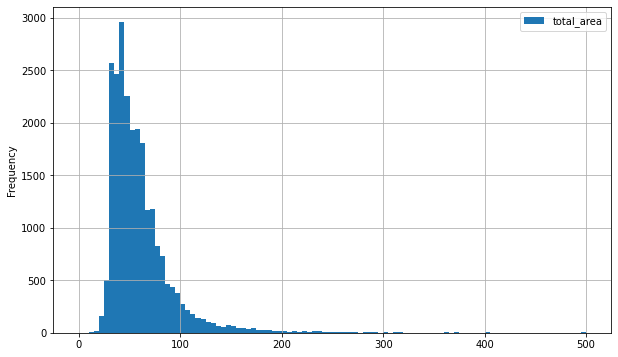

In [22]:
#изучим общую площадь
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (10, 6), range = (0,500))
data['total_area'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

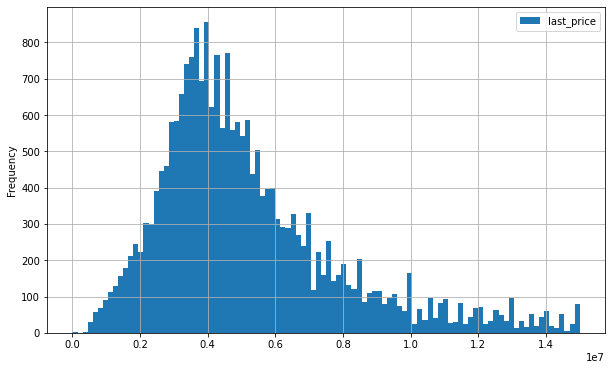

In [23]:
#изучим цену
#data['last_price'] = data['last_price']/1000000
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (10, 6))
data['last_price'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

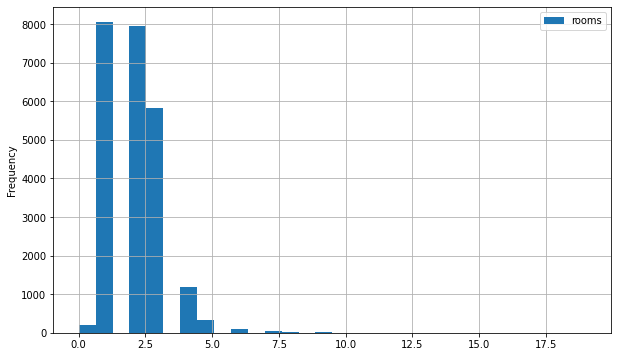

In [24]:
#изучим число комнат
data
data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (10, 6))
data['rooms'].describe()

count    23699.000000
mean         2.720610
std          0.201392
min          2.000000
25%          2.600000
50%          2.720000
75%          2.720000
max          4.000000
Name: ceiling_height, dtype: float64

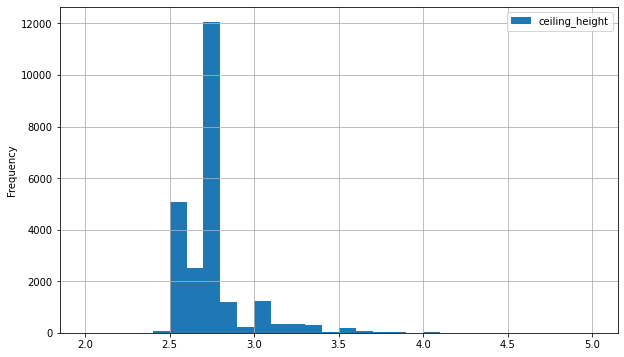

In [25]:
#изучим высоту потолков
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,5), grid=True, figsize = (10, 6))
data['ceiling_height'].describe()

**Вывод:** 
1. Общая площадь в нашей выборке колеблется от 12 до 900 м2, среднее значение 60, а медиана 52 м2. Распределение данных Гаусса.

2. Цены на недвижимость имеют среднее значение в 6,5 млн руб., медиана 4,6 млн руб. Распределение данных Гаусса.

3. Количество комнат колеблется от 1 до 19. Больше всего однокомнатных квартир.

4. Высота потолков в среднем составляет 2,7 м.

###   Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

Диаграмма размаха времени продажи квартиры


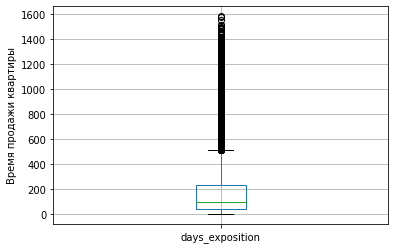

In [26]:
print('Диаграмма размаха времени продажи квартиры')
data.boxplot('days_exposition')
plt.ylabel('Время продажи квартиры')
plt.show()

Значение по количеству дней в продаже свыше 250 лучше отсечь, т.к. это редкие квартиры с нестандартной планировкой и такие квартиры могут продаваться очень долго, для статистики они нам не нужны, т.к. сильно меняют сренее значение по сроку продажи квартир.

In [27]:
good_data = data.query('days_exposition < 250')
good_data['days_exposition'].agg(['mean','median'])

mean      83.215955
median    63.000000
Name: days_exposition, dtype: float64

In [28]:
#посмотрим процентное распределение дней продажи квартир
good_data['days_exposition'].describe()

count    15744.000000
mean        83.215955
std         63.509757
min          1.000000
25%         33.000000
50%         63.000000
75%        123.000000
max        249.000000
Name: days_exposition, dtype: float64

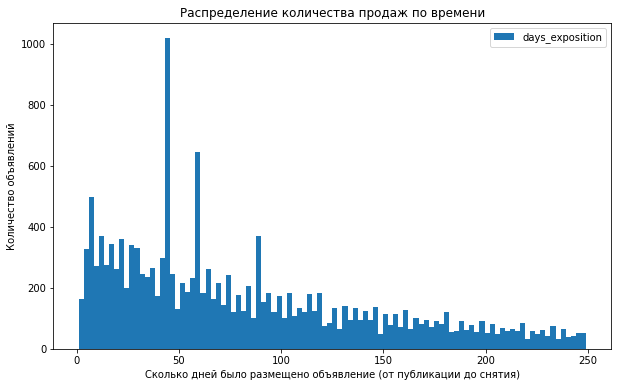

In [29]:
good_data.plot(kind='hist',y='days_exposition',title='Распределение количества продаж по времени', bins=100, figsize=(10, 6))

plt.xlabel('Сколько дней было размещено объявление (от публикации до снятия)')
plt.ylabel('Количество объявлений')
plt.show()

**Вывод:**
В среднем продажа среднестатистичекой квартиры занимает до 3-ех месяцев в зависимотсти от сопутствующих факторов(площади, цены, удалённости от центра). Быстро проданные квартиры определяются границей в месяц, продажа больше 4 месяцев можно считать затянувшейся. 

###  Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

Диаграмма размаха высоты потолков


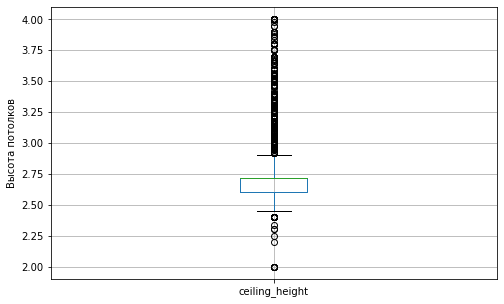

In [30]:
#построим нрафик для дальнейшего создания нового сортированной БД

print('Диаграмма размаха высоты потолков')
good_data.boxplot(column=['ceiling_height'], figsize=(8,5), grid=True)

plt.ylabel('Высота потолков')
plt.show()

In [31]:
#ранее вводили переменную "good_data" из нее сформируем сортированный DB

#отсечём чрезмерно выбивающиеся значения, площадь свыше 100 кв.метров нам для дальнейшей статистики не интересна.
good_data = data.query('total_area < 100')
#отбросим выбивающиеся значения по цене, т.к. они будут мешать при построении графика, а так же усложнят анализ
#и прочтение данных с гистограммы. Очевидно, что стоимость квартир свыше 9 млн. встречается редко в наших данных,
#отсечём лишнее.
good_data = good_data.query('last_price < 9000000')
#основываясь на графике "ящика с усами", отсечём квартиры с потолками свыше 2,9 метра, а так же ниже 2,4
good_data = good_data.query('ceiling_height < 2.9 and ceiling_height > 2.4')

### Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена квадратного метра от общей площади квартиры, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года.

**Изучим зависимость цены квадратного метра от общей площади квартиры.**

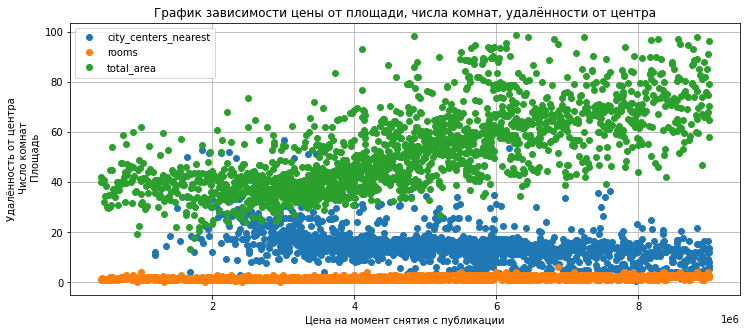

In [32]:
#переведем в км, чтобы построить график
good_data['city_centers_nearest'] = good_data['city_centers_nearest']/1000

(good_data
    
     .pivot_table(index='last_price', values=['total_area','rooms','city_centers_nearest'])
     .plot(style='o', grid=True, figsize=(12, 5), title='График зависимости цены от площади, числа комнат, удалённости от центра')
)
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Удалённость от центра\n Число комнат\n Площадь')
plt.show()


**Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.**

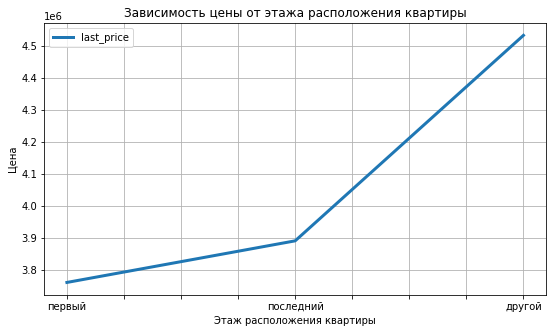

In [33]:
(good_data
    .pivot_table(index='floor_category', values='last_price').sort_values(by='last_price', ascending=True)
    .plot(grid=True, figsize=(9, 5),linewidth=3, title='Зависимость цены от этажа расположения квартиры')
)
plt.xlabel('Этаж расположения квартиры')
plt.ylabel('Цена')
plt.show()

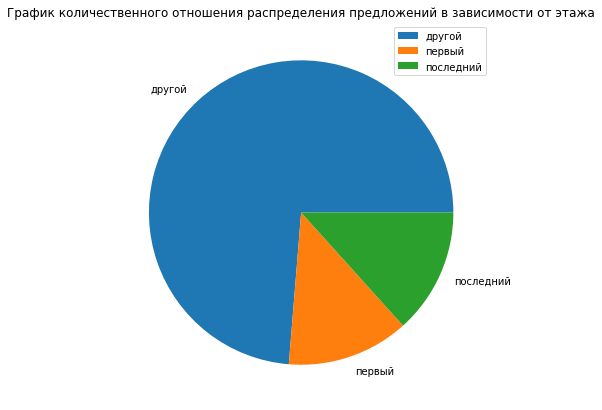

In [34]:
good_data.pivot_table(index='floor_category',values='last_price',aggfunc='count').plot.pie(y='last_price', figsize=(7,7), label='', title='График количественного отношения распределения предложений в зависимости от этажа')
plt.show()

**Вывод:**
Глядя на графики становится очевидно, что ценится любой другой этаж здания кроме первого и последнего, как по цене, так и по количеству предложений на рынке. А так же очевидна зависимость цены от удалённости от центра и площади квартиры, чем квартира больше и ближе к центру, тем цена выше. Чего нельзя однозначно сказать о количестве комнат, здесь график цены меняется не так значительно.

**Также изучим зависимость цены от даты размещения: дня недели, месяца и года.**

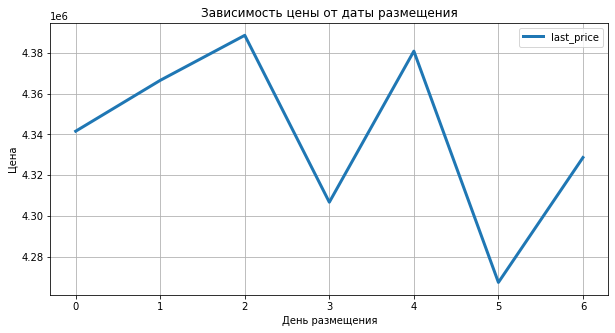

In [35]:
(good_data
    
     .pivot_table(index='weekday_exposition', values=['last_price'])
     .plot(grid=True, figsize=(10, 5),linewidth=3,title='Зависимость цены от даты размещения')
)
plt.xlabel('День размещения')
plt.ylabel('Цена')

plt.show()

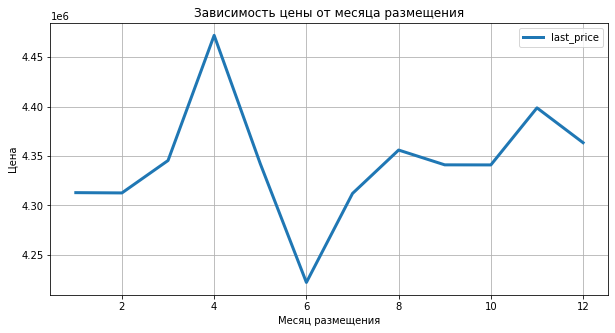

In [36]:
(good_data
    
     .pivot_table(index='month_exposition', values=['last_price'])
     .plot(grid=True, figsize=(10, 5),linewidth=3, title='Зависимость цены от месяца размещения')
)
plt.xlabel('Месяц размещения')
plt.ylabel('Цена')

plt.show()

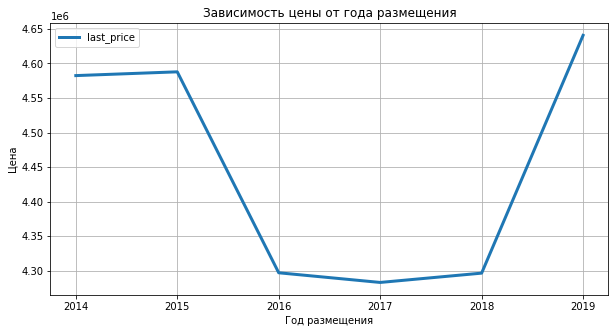

In [37]:
(good_data
    
     .pivot_table(index='year_exposition', values=['last_price'])
     .plot(grid=True, figsize=(10, 5),linewidth=3,title='Зависимость цены от года размещения')
     
)
plt.xlabel('Год размещения')
plt.ylabel('Цена')

plt.show()

**Вывод:**
Удивительно, но объявления размещённые во вторник и четверг имеют большую цену, чем в другие дни недели. На графике помесячного размещения объявлений хорошо просматирваются падение в середине года, в этот месяц лучше квартиры не продавать, т.к. средняя стоимость рынка будет ниже чем в другие месяцы. По годовой тенденции наблюдается падение в стоимости жилья в 2016-2018 годах и резкий взлёт стоимости начиная с 2018 года, что вызвано скорей всего большим спросом на рынке недвижимости.

###  Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [38]:
data_top_10 = data.pivot_table(index='locality_name', values=['first_day_exposition'], aggfunc='count').sort_values(by='first_day_exposition', ascending=False).head(10)
data_top_10.columns=['number_of_ads']
data_top_10

,number_of_ads
locality_name,
Санкт-Петербург,15721
посёлок Мурино,556
посёлок Шушары,440
Всеволожск,398
Пушкин,369
Колпино,338
посёлок Парголово,327
Гатчина,307
деревня Кудрово,299


**Вывод**
Очевидный лидер по количеству объявлений это "Санкт_Петербург", остальные номинанты ТОП-10 расположены по области города примерно с равным количеством объявлений.

**Посчитаем среднюю цену квадратного метра в этих населённых пунктах.**

In [39]:
data_top_10['cost_per_meter_mean'] = data.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc='mean')
data_top_10_s=data_top_10.style.format({'cost_per_meter_mean':'{:.2f} ₽'})
data_top_10_s

,number_of_ads,cost_per_meter_mean
locality_name,,
Санкт-Петербург,15721,114848.57 ₽
посёлок Мурино,556,85681.31 ₽
посёлок Шушары,440,78676.90 ₽
Всеволожск,398,68654.01 ₽
Пушкин,369,103125.37 ₽
Колпино,338,75424.15 ₽
посёлок Парголово,327,90175.49 ₽
Гатчина,307,68745.69 ₽
деревня Кудрово,299,92473.09 ₽


**Вывод:**
По средней стоимости за квадратный метр жилья можно сказать, что низкое количество объявлений не сильно влияет на цену кв.метра, так например Пушкин и посёлок Парголово имеют практически ту же цену в 100 т.р. за кв. метр как и жил.площадь в Санкт-Петербурге.

**Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья.**

In [40]:
(data_top_10_s
 .highlight_max(color='yellowgreen', subset='cost_per_meter_mean')
 .highlight_min(color='coral', subset='cost_per_meter_mean')
)

,number_of_ads,cost_per_meter_mean
locality_name,,
Санкт-Петербург,15721,114848.57 ₽
посёлок Мурино,556,85681.31 ₽
посёлок Шушары,440,78676.90 ₽
Всеволожск,398,68654.01 ₽
Пушкин,369,103125.37 ₽
Колпино,338,75424.15 ₽
посёлок Парголово,327,90175.49 ₽
Гатчина,307,68745.69 ₽
деревня Кудрово,299,92473.09 ₽


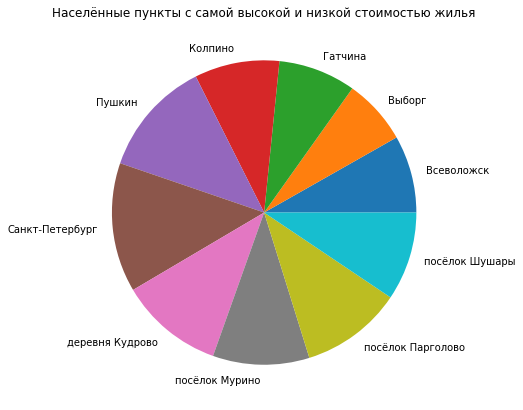

In [41]:
data_top_10.pivot_table(index='locality_name',values='cost_per_meter_mean').plot.pie(y='cost_per_meter_mean', figsize=(7,7), legend=False, label='', title='Населённые пункты с самой высокой и низкой стоимостью жилья')
plt.show()

**Вывод:**
Самая низкая стоимость жилья из нашей ТОП-10 расположена в Выборге и Всеволожске и Гатчине, а на первом месте расположился Санкт-Петребург, с незначительным отрывом от Пушкина

**Изучим предложения квартир: выделим квартиры в Санкт-Петербурге. Выясним, какая область входит в центр.**

In [42]:
local_spb = data.loc[data['locality_name'] == 'Санкт-Петербург']
local_spb['city_centers_nearest'].isna().sum()

61

In [43]:
local_spb=local_spb.dropna(subset=['city_centers_nearest'])
#Создадим столбец с расстоянием до центра в километрах и округлим их до целых значений.
local_spb['city_centers_nearest_km']=(local_spb['city_centers_nearest']/1000).round().astype(int)
local_spb['city_centers_nearest_km'].describe()

count    15660.000000
mean        11.596041
std          4.863594
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: city_centers_nearest_km, dtype: float64

Диаграмма размаха удалённости от центра


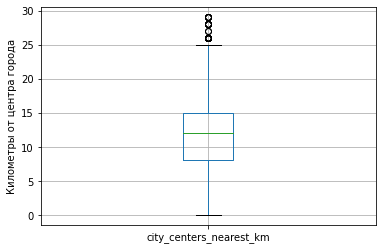

In [44]:
print('Диаграмма размаха удалённости от центра')
local_spb.boxplot('city_centers_nearest_km')

plt.ylabel('Километры от центра города')
plt.show()

In [45]:
local_spb = local_spb.loc[local_spb['city_centers_nearest_km'] < 25]

**Вывод:**
Очевидно, что город Санкт-Петрбург очень большой, но даже для него расстояние больше 25 км от центра не может считаться центром города, по-этому мы отсекли мешающие статисткие и анализу данные

**Посчитаем среднюю цену для каждого километра**

In [46]:
mean_cost_per_km = local_spb['last_price'].sum()/local_spb['city_centers_nearest_km'].sum()
print('Средняя цена для каждого километра составляет {:.0f} ₽'.format(mean_cost_per_km))

Средняя цена для каждого километра составляет 700005 ₽


**Построим график: он будет показывать, как цена зависит от удалённости от центра. А так же определим границу центральной зоны.**

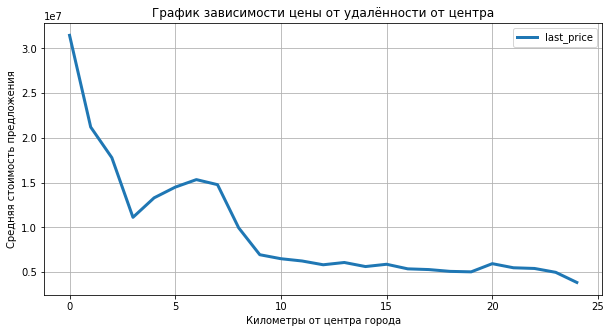

In [47]:
local_spb.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean').plot(figsize=(10,5), grid=True, linewidth=3, title='График зависимости цены от удалённости от центра')
plt.xlabel('Километры от центра города')
plt.ylabel('Средняя стоимость предложения')
plt.show()

**Вывод:**
Очевидно, что падение цены на графике сильно изменилось при достижении значения в 9-10 км, это говорит нам, что центральным районом можно считать все квартиры в удалении от центра не более чем на 10 км.

### Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [48]:
local_spb_centre = local_spb.loc[local_spb['city_centers_nearest_km']<10]
analysis_1=local_spb_centre[['locality_name','total_area','last_price','rooms','ceiling_height']].reset_index(drop=True)
analysis_1.corr()

,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.643813,0.750790,0.272342
last_price,0.643813,1.000000,0.351014,0.137612
rooms,0.750790,0.351014,1.000000,0.275618
ceiling_height,0.272342,0.137612,0.275618,1.000000


In [49]:
analysis_1.describe()

,total_area,last_price,rooms,ceiling_height
count,4715.000000,4.715000e+03,4715.000000,4715.000000
mean,86.437506,1.327110e+07,2.671050,2.903200
std,56.839196,2.224446e+07,1.393877,0.298542
min,12.000000,1.219000e+04,0.000000,2.000000
25%,51.000000,5.954074e+06,2.000000,2.720000
50%,72.600000,8.500000e+06,3.000000,2.730000
75%,102.000000,1.307500e+07,3.000000,3.040000
max,900.000000,7.630000e+08,19.000000,4.000000


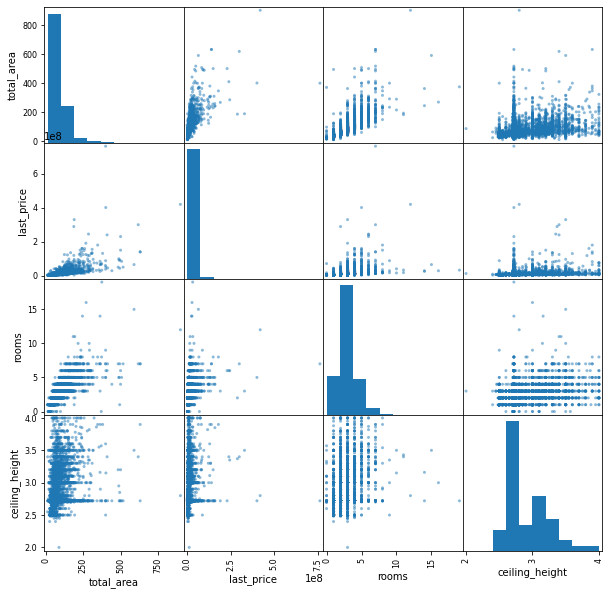

In [50]:
pd.plotting.scatter_matrix(analysis_1, figsize=(10, 10)) 

plt.show()

**Вывод:**
Из приведённых графиков становится очевидно, что основной сегмент квартир в центре города занимают 2-3 комнатные квартиры, площадью до 73 кв.метров, с потолками 2,7 м., средней ценой до 8,5 млн. рублей.

**Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)**

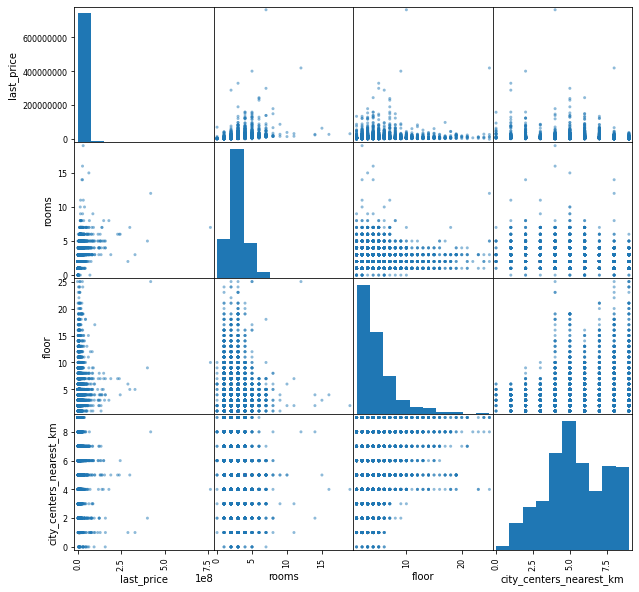

In [51]:
analysis_2 = local_spb_centre[['last_price','rooms','floor','city_centers_nearest_km','first_day_exposition']]
pd.plotting.scatter_matrix(analysis_2, figsize=(10, 10))
plt.show()

**Определим зависимость цены от даты размещения объявления при помощи графика**

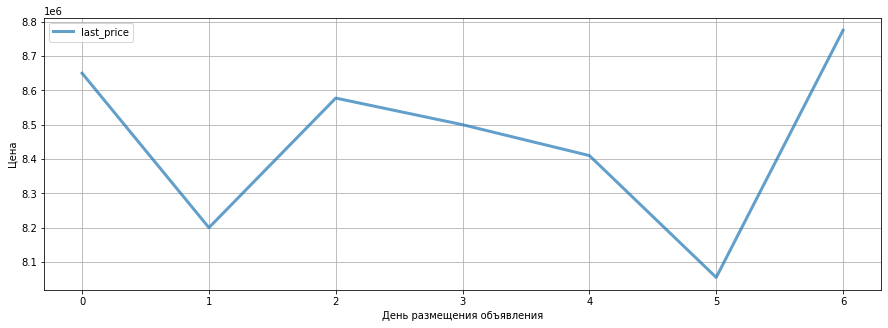

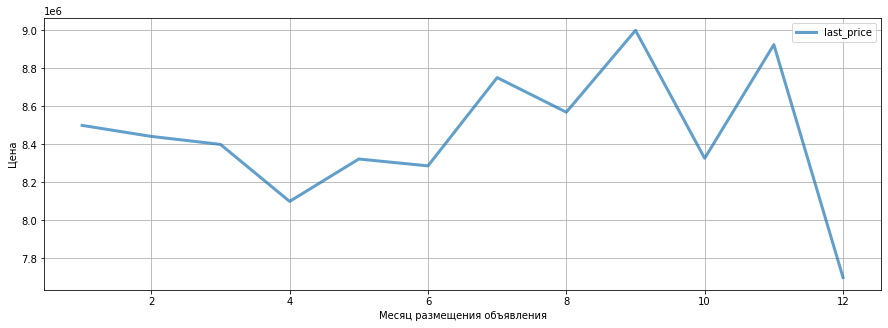

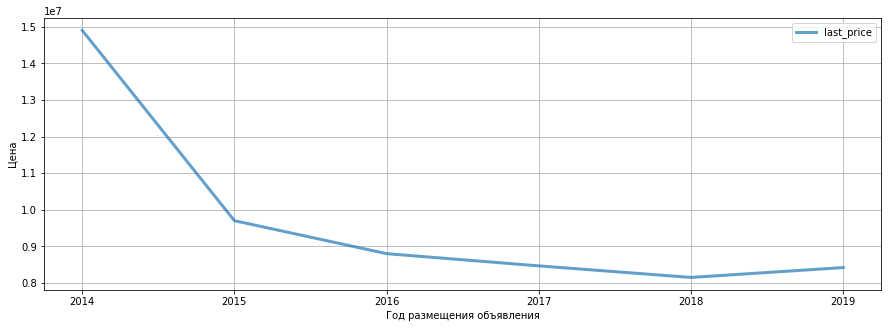

In [52]:
local_spb_centre.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median').plot(grid=True,linewidth=3, alpha=0.7, figsize=(15,5))
plt.xlabel('День размещения объявления')
plt.ylabel('Цена')
plt.show()

local_spb_centre.pivot_table(index='month_exposition', values='last_price', aggfunc='median').plot(grid=True,linewidth=3, alpha=0.7, figsize=(15,5))
plt.xlabel('Месяц размещения объявления')
plt.ylabel('Цена')
plt.show()

local_spb_centre.pivot_table(index='year_exposition', values='last_price', aggfunc='median').plot(grid=True,linewidth=3, alpha=0.7, figsize=(15,5))
plt.xlabel('Год размещения объявления')
plt.ylabel('Цена')
plt.show()

**Вывод:**
В целом из графиков можно сделать вывод о том, что цена объявелния квартир в центре города не зависит от удалённости от центра, зависимость цены менятся только от площади и количесва комнат, так же ценятся квартиры в центре города не выше 10 этажа. Изучив зависимость этажности и удаления от центра можно заметить, что чем дальше от центра города, тем выше этаж квартиры в объявлении. А вот по дате размещения объявления заметен основной пик в стоимости жилья в 2014-2015 годах с плавным снижением к 2019 году, при этом цена выше к концу года, в то время как по остальным предложениям стоимость жилья за пределами центра активно растёт начиная с 2017 года.

# Шаг 5. Общий вывод

Подводя итог проделанной работы по подготовке данных к анализу мы столкнулись с большим количеством пропусков в колонках, которые могут влиять как на среднюю цену предлодения квартир на рынке, так и на анализ выделенных групп в частности. Тем не менее какие-то данные мы заполнили средним значением дабы не терять основной массив статистичесих данны, а некоторые данные оставили без изменений с пропущенными значениями. По результату проделанной работы по обработке и анализу недостающих и "битых" данных, несомненно надо обратить внимание коллег по подготовке и сбору данных на заполняемость ячеек, либо на крректность выгрузки данных из программы. Ошибок связанных с человеческим фактором(опечаток и пр.) довольно мало, что сильно облегчило труд по предобработке материала для анализа.

После избавления нашей базы от 'мусорных' и выбивающихся значений мы выполнили такие операции как подсчёт средней стоимости квадратного метра жилья, стоимость каждого километра удаления от центра, выделили сегмент квартир расположенных в центре и проанализировали их параметры, а так же вывели статистику по скорости продажи объявления с даты его размещения, факторы влияющие на это и проанализировали статистику продаж в зависимости от периода размещения объявления.

Для большей наглядности при анализе использовались графики, из которых лего можно сделать вывод о том, что лидером по размещению объявлений о продаже недвижимости является "Санкт-Петербург", несмотря на это средняя цена квадратного метра приблизительно такая же как и по области. Тенденция рынка такова, что начиная с 2017 года активно растёт спрос на жильё за пределами центра Петербурга, при этом люди в основной своей массе стараются найти предложения квартир на любом этаже за исключением первого и последнего, за частую это высотные здания и новостройки. В центре же города ситуция обратная, застройки практически никакой не ведётся, этажность домов не большая и продажа квартир ведётся из старого фонда, что и отражается на снижающемся спросе начиная с 2016 года.

В сухом остатке в большинстве случаев покупки жилья люди выбирают 1-2 комнатные квартиры в высотной новостройке по периметру города Санкт-Петребург, с средней стоимостью в 100 т.р. за кв.метр. и высотой потолков 2,7 м. Таким образом можно сделать вывод о том, что количество таких домов и соответственно предложений будет расти в след за ценой в отличии от цен на жильё расположенного по центру исторического района города в невысоких домах из старого фонда.